In [2]:
pip install matplotlib seaborn

  Using cached matplotlib-3.10.7-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp312-cp312-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp312-cp312-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl (73 kB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)

   ---------------------------------------- 0/7 [pyparsing]
   -----------------

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../Dataset/ResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."


## Understanding Data

In [3]:
print("Shape of Dataset : ", df.shape)

Shape of Dataset :  (962, 2)


In [4]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

C:\Users\rawat\AppData\Local\Temp\ipykernel_2524\4182751815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='husl')  # <-- use x= instead of positional


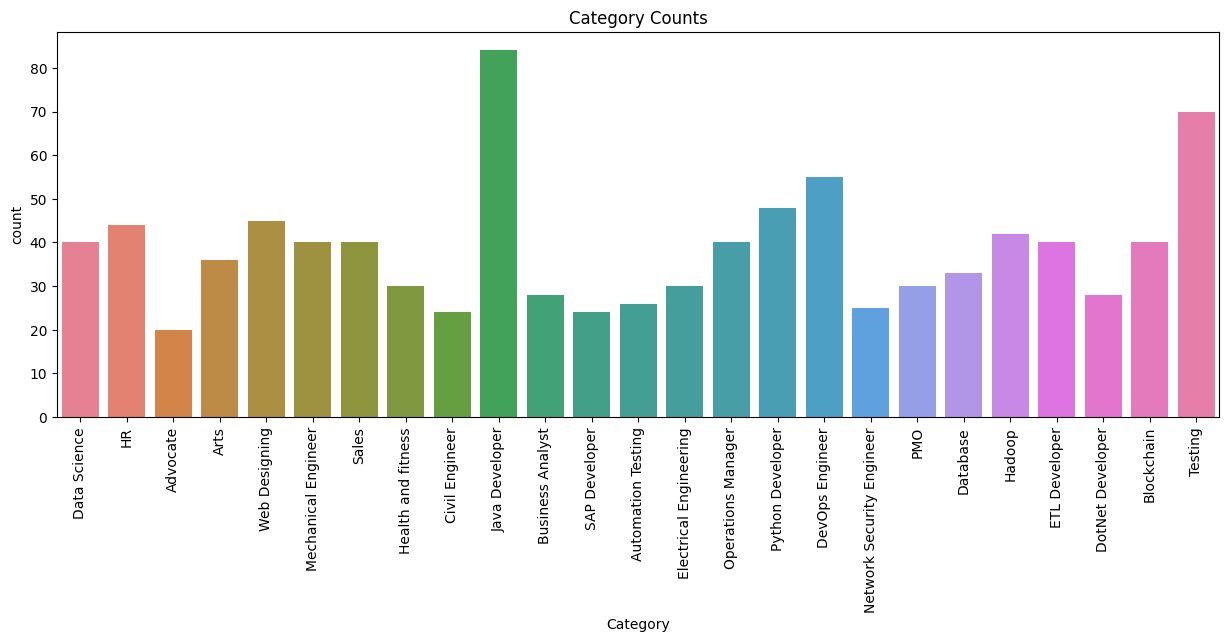

In [5]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Category', data=df, palette='husl')  # <-- use x= instead of positional
plt.xticks(rotation=90)
plt.title('Category Counts')
plt.show()

In [6]:
print("Total Unique Category : ", len(df['Category'].unique()))

Total Unique Category :  25


In [7]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

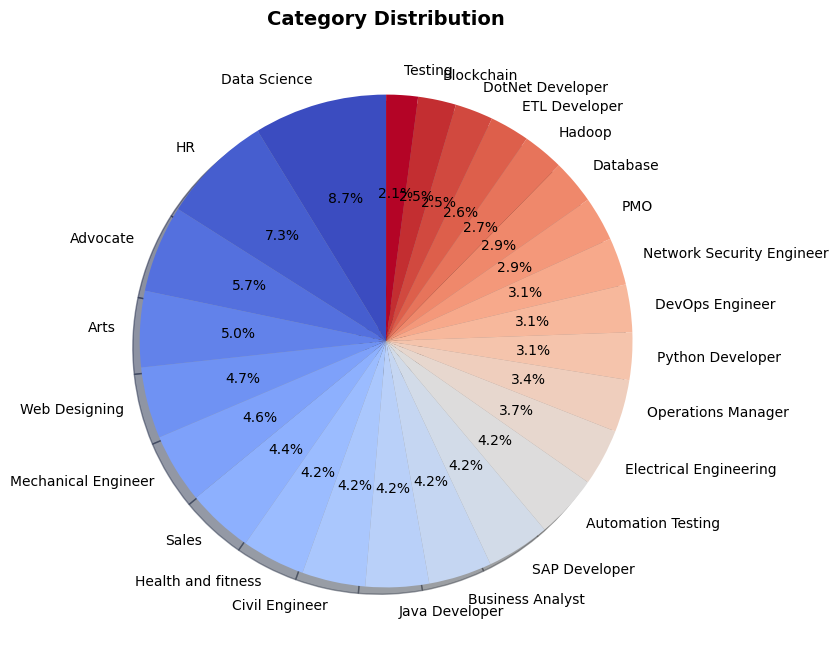

In [8]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

# Create colors dynamically based on number of categories
colors = plt.cm.coolwarm(np.linspace(0, 1, len(labels)))

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    colors=colors
)
plt.title('Category Distribution', fontsize=14, fontweight='bold')
plt.show()

## Exploring Resume

In [9]:
df['Category'][0]

'Data Science'

In [10]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

## Text Preprocessing

Cleaning Data:

1. URLs,
2. hashtags,
3. mentions,
4. special letters,
5. punctuations:

In [5]:
import re

def cleanResume(txt):
    clean_text = re.sub(r'http\S+', ' ', txt)   # Removes URL
    clean_text = re.sub(r'RT|cc', ' ', clean_text) 
    clean_text = re.sub(r'#\S+', ' ', clean_text) # Removes HashTags
    clean_text = re.sub(r'@\S+', ' ', clean_text)  # # Removes @ Signs
    clean_text = re.sub(r'[%s]' % re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', clean_text)  # Removes Special Characters
    clean_text = re.sub(r'[^\x00-\x7f]', ' ', clean_text) 
    clean_text = re.sub(r'\s+', ' ', clean_text)
    return clean_text


In [12]:
cleanResume("my #### $ #  #resume webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it '

In [6]:
df['Cleand_Resume'] = df['Resume'].apply(lambda x : cleanResume(x) )

In [7]:
df.head()

,Category,Resume,Cleand_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",Education Details MCA YMCAUST Faridabad Haryan...


In [8]:
df['Resume'][3]

"Skills â\x80¢ R â\x80¢ Python â\x80¢ SAP HANA â\x80¢ Tableau â\x80¢ SAP HANA SQL â\x80¢ SAP HANA PAL â\x80¢ MS SQL â\x80¢ SAP Lumira â\x80¢ C# â\x80¢ Linear Programming â\x80¢ Data Modelling â\x80¢ Advance Analytics â\x80¢ SCM Analytics â\x80¢ Retail Analytics â\x80¢Social Media Analytics â\x80¢ NLP Education Details \nJanuary 2017 to January 2018 PGDM Business Analytics  Great Lakes Institute of Management & Illinois Institute of Technology\nJanuary 2013 Bachelor of Engineering Electronics and Communication Bengaluru, Karnataka New Horizon College of Engineering, Bangalore Visvesvaraya Technological University\nData Science Consultant \n\nConsultant - Deloitte USI\nSkill Details \nLINEAR PROGRAMMING- Exprience - 6 months\nRETAIL- Exprience - 6 months\nRETAIL MARKETING- Exprience - 6 months\nSCM- Exprience - 6 months\nSQL- Exprience - Less than 1 year months\nDeep Learning- Exprience - Less than 1 year months\nMachine learning- Exprience - Less than 1 year months\nPython- Exprience - 

In [9]:
df['Cleand_Resume'][3]

'Skills R Python SAP HANA Tableau SAP HANA SQL SAP HANA PAL MS SQL SAP Lumira C Linear Programming Data Modelling Advance Analytics SCM Analytics Retail Analytics Social Media Analytics NLP Education Details January 2017 to January 2018 PGDM Business Analytics Great Lakes Institute of Management Illinois Institute of Technology January 2013 Bachelor of Engineering Electronics and Communication Bengaluru Karnataka New Horizon College of Engineering Bangalore Visvesvaraya Technological University Data Science Consultant Consultant Deloitte USI Skill Details LINEAR PROGRAMMING Exprience 6 months RETAIL Exprience 6 months RETAIL MARKETING Exprience 6 months SCM Exprience 6 months SQL Exprience Less than 1 year months Deep Learning Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Python Exprience Less than 1 year months R Exprience Less than 1 year monthsCompany Details company Deloitte USI description The project involved analysing historic deals and com

## Words to Categorical Values

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [12]:
df.head()

,Category,Resume,Cleand_Resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \nMay 2013 to May 2017 B.E ...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \n MCA YMCAUST, Faridabad...",Education Details MCA YMCAUST Faridabad Haryan...


In [13]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

## Vectorization

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [15]:
vectorized_resume = tfidf.fit_transform(df['Cleand_Resume'])

In [16]:
vectorized_resume

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 164261 stored elements and shape (962, 7351)>

## Training

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(vectorized_resume, df['Category'], test_size=0.25, random_state=42)

In [18]:
X_train.shape, X_test.shape

((721, 7351), (241, 7351))

In [19]:
Y_train.shape, Y_test.shape

((721,), (241,))

## Training Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(KNeighborsClassifier()) 
clf.fit(X_train, Y_train)

,estimator,KNeighborsClassifier()
,n_jobs,None
,verbose,0
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [21]:
y_pred = clf.predict(X_test)

In [22]:
y_pred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23,  2,  3, 18, 14,  1, 12, 13, 22, 12, 11, 23,
       18, 15, 19, 15,  6,  0, 15,  8,  9, 16,  6, 12, 14,  9, 15,  4,  0,
       20, 16,  7,  8, 23

In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy Score : ", accuracy*100 , "%")

Accuracy Score :  98.3402489626556 %


## Saving Model

In [24]:
import pickle

pickle.dump(tfidf, open('../Model/tfidf.pkl', 'wb'))
pickle.dump(clf, open('../Model/job-role-prediction-model.pkl', 'wb'))

## Prediction

In [27]:
my_resume = """ 

 Education
 Graphic Era Hill University
 Bachelor of Technology (B.Tech) in Computer Science Engineering; GPA: 8.62 / 10
 Technical Skills
 Dehradun, Uttarakhand
 August 2022– Present
 • Programming Languages: C, C++, Python, Java, JavaScript, HTML, CSS
 • Databases: MySQL, MongoDB, Oracle
 • Frameworks & Libraries: Tensorflow, Pandas , Scikit-learn, React js, Langchain
 • Developer Tools: Git, GitHub, Docker, IBM Cloud
 • Specialized Skills: Artificial Intelligence, Machine Learning, Natural Language Processing (NLP), Generative AI,
 Prompt Engineering
 • Coding Platforms: Leetcode (500+ problems), GeeksForGeeks (100+ problems)
 Experience
 IBM SkillsBuild Internship Program
 Intern
 Remote
 July 2025– August 2025
 • Completed a 4-week virtual internship focused on Cloud Computing and Artificial Intelligence using IBM
 Cloud Lite.
 • Gained practical exposure through IBM 3 learning modules-Getting Started with AI, Journey to Cloud & RAG Lab
 • Developed a Network Intrusion Detection System with 99.5% accuracy using Watsonx.ai and AutoAI.
 • Built and demonstrated an Agentic AI Nutrition Assistant leveraging LLaMA-3-2-90B, clearly communicating
 design decisions and outcomes to mentors.
 Projects
 Stock Price Prediction — Deep Learning, LSTM
 July 2025– August 2025
 • Designed and trained an LSTM-based deep learning model for stock trend prediction using 100,000+ historical data
 points.
 • Enhanced prediction reliability by 28% and launched a Streamlit web app, providing 50+ users with an intuitive
 interface to explore and visualize stock forecasts in real time.
 • Translated complex model outputs into clear insights through concise presentations, fostering cross-team
 understanding and accelerating iteration cycles by 15%.
 SMS Spam Detection — Machine Learning, NLP, Python, Streamlit
 June 2025– July 2025
 • Achieved 99.1% accuracy by designing a spam detection model with NLP preprocessing on 5,500+ messages, and
 clearly communicated performance metrics to stakeholders for informed decision-making.
 • Applied 3+ ML algorithms including Extra Trees Classifier, and deployed the best-performing model as a Streamlit
 web app to ensure accessibility for non-technical users.
 Movie Recommender System — Cosine Similarity, NLP, Python, Streamlit
 May 2025– June 2025
 • Built a content-based movie recommender system using TF-IDF vectorization on 18,000+ movie descriptions.
 • Optimized recommendation accuracy by 30% through cosine similarity–based scoring, and communicated findings
 in team review sessions.
 AI Doctor Assistant — Python, Gradio, Groq API, Whisper, LLaMA-4, gTTS April 2025– May 2025
 • Developed a multimodal AI assistant with Gradio, enabling real-time speech and image-based medical consultations
 with 90%+ transcription accuracy.
 • Integrated Whisper-v3 and LLaMA-4 to process voice and image inputs, generating doctor-like diagnostic responses
 in under 10 seconds.
 • Automated voice feedback using gTTS, reducing manual consultation simulation time by 70%, and presented the
 system to peers through live demos for feedback.
 Achievements
 • AWS Artificial Intelligence and Machine Learning Practitioner- [Certificate]
 • IBM Cloud AI Foundations- [Certificate]
 • PwC Launchpad Trainee (Cyber Security)- [Certificate]
 • Physics Wallah- Data Science Masters- [Certificate

"""

In [25]:
## Maping all the Predition Id to its respective Job Role
job_role_dict = {
    6: 'Data Science',
    12: 'HR',
    0: 'Advocate',
    1: 'Arts',
    24: 'Web Designing',
    16: 'Mechanical Engineer',
    22: 'Sales',
    14: 'Health and fitness',
    5: 'Civil Engineer',
    15: 'Java Developer',
    4: 'Business Analyst',
    21: 'SAP Developer',
    2: 'Automation Testing',
    11: 'Electrical Engineering',
    18: 'Operations Manager',
    20: 'Python Developer',
    8: 'DevOps Engineer',
    17: 'Network Security Engineer',
    19: 'PMO',
    7: 'Database',
    13: 'Hadoop',
    10: 'ETL Developer',
    9: 'DotNet Developer',
    3: 'Blockchain',
    23: 'Testing'
}
job_role_dict
pickle.dump(job_role_dict, open('../Model/job-role-dict.pkl', 'wb'))


In [28]:
import pickle

## Load the trained classifier model
model = pickle.load(open('../Model/job-role-prediction-model.pkl', 'rb'))

## Clean the Input Resume
cleaned_resume = cleanResume(my_resume)

## Transform the cleaned resume to TF-IDF vector
input_features = tfidf.transform([cleaned_resume])

## Make the Prediction
prediction_id = model.predict(input_features)[0]

## Map to its respective Job Role
category_name = job_role_dict.get(prediction_id, "Unknown")

print("Prediction Category: ", category_name)
print("Prediction ID: ", prediction_id)




Prediction Category:  Data Science
Prediction ID:  6
